# Arsenal Social Sentiment Analysis
## Forecasting User Sentiment between games. 
by *Ben N. Bellman* 
<br> Prepared as Springboard Capstone Project
<br> *4/13/2022*

<img src="images/who-s-denilo-SuBb_SiEEM8-unsplash.jpg" style="width:800px;height:400px"/>

### WARNING: 
*Although the usernames have been anonymized as to protect the privacy of the users in this analysis, the tweets are still in raw format and may contain inappropriate / sensitive content. Viewer discretion is advised*

## Outline

## Data Mapping: 

One of the important things to know for the analysis is the schedule of the games.
The objective in the social sentiment analysis is to predict whether or not a specific tweet is likely to come  

In [1]:
%load_ext watermark
%watermark 

Last updated: 2022-04-15T09:55:03.422082-07:00

Python implementation: CPython
Python version       : 3.9.12
IPython version      : 8.0.1

Compiler    : MSC v.1929 64 bit (AMD64)
OS          : Windows
Release     : 10
Machine     : AMD64
Processor   : Intel64 Family 6 Model 142 Stepping 12, GenuineIntel
CPU cores   : 8
Architecture: 64bit



In [23]:
## We start by importing the packages we will use.

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import statsmodels.api as sm
from statsmodels.graphics.api import abline_plot 

from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from imblearn.under_sampling import RandomUnderSampler

from sklearn.linear_model import LinearRegression, LogisticRegression, SGDClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier, plot_tree, export_graphviz
from sklearn.ensemble import RandomForestClassifier,RandomForestRegressor, GradientBoostingClassifier, AdaBoostClassifier
import xgboost as xgb 

from sklearn.metrics import precision_recall_curve, roc_curve, auc, confusion_matrix, accuracy_score, precision_score
from sklearn.metrics import mean_squared_error as mse, r2_score, mean_absolute_error as mae, f1_score, fbeta_score 
from sklearn.metrics import plot_confusion_matrix,classification_report, balanced_accuracy_score, recall_score
from sklearn.metrics import roc_auc_score, log_loss,matthews_corrcoef, ConfusionMatrixDisplay

from io import StringIO 
from IPython.display import Image,HTML 
import pydotplus
import graphviz
import shap

## Import Local Functions

from functions import (preview_data,
                       get_missing_counts,
                       get_value_counts,
                       get_unique_column_count,
                       get_datetimes,
                       drop_null_values)             

import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_colwidth',-1)
%matplotlib inline

In [3]:
## Load the Data
df = pd.read_csv('Twitter_Anonymized_Data.csv', index_col = [0])

## I. Data Exploration and Data Wrangling

In [4]:
## Start by previewing the data:
preview_data(df)

First Five Rows of Data: 



,Date,Username,Tweet,TweetLikes,TweetReplies,RetweetCount
0,2022-04-13 13:35:44+00:00,Anonymous115424,@dustsorcerer 1. Combat Warriors\n2. Black Mag...,0,0,0
1,2022-04-13 13:35:43+00:00,Anonymous56702,@El_Mozquetero So you want arsenal to be losin...,0,0,0
2,2022-04-13 13:35:42+00:00,Anonymous130322,"Letras que dibujan sonrisas, que llenan el alm...",0,0,0
3,2022-04-13 13:35:42+00:00,Anonymous207518,@arse_talk @El_Mozquetero I don't think an Ars...,0,0,0
4,2022-04-13 13:35:36+00:00,Anonymous168892,@bubblecheebutt Je vais pas relever le connard...,0,0,0



 Shape: 

(500000, 6)

 Info: 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 500000 entries, 0 to 499999
Data columns (total 6 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   Date          500000 non-null  object
 1   Username      499935 non-null  object
 2   Tweet         500000 non-null  object
 3   TweetLikes    500000 non-null  int64 
 4   TweetReplies  500000 non-null  int64 
 5   RetweetCount  500000 non-null  int64 
dtypes: int64(3), object(3)
memory usage: 26.7+ MB
None


In [5]:
## Get the missing values
get_missing_counts(df)

Missing Value Percentages by Column: 

Date -----> 0 -----> 0.0%
Username -----> 65 -----> 0.01%
Tweet -----> 0 -----> 0.0%
TweetLikes -----> 0 -----> 0.0%
TweetReplies -----> 0 -----> 0.0%
RetweetCount -----> 0 -----> 0.0%


In [6]:
## Drops the missing Usernames. 
drop_null_values(df,['Username'])

In [7]:
## Converts date to datetime. 

# Fix this --> get_datetimes(df,'Date',['Date'])
df['Date'] = df['Date'].apply(pd.to_datetime)
print('Date Ranges: {} -- {}'.format(df['Date'].min(), df['Date'].max()))

Date Ranges: 2022-03-29 21:13:43+00:00 -- 2022-04-13 13:35:44+00:00


Ok, so the date ranges are between 03-29-22 and 4-13-22, so the 500,000 tweets about Arsenal are all in a two week period. 
<br> In that two week period, Arsenal were coming out of the international break and played two games which they both lost: 
- **Crystal Palace** -- *04-04-22*  
- **Brighton & Holvion** -- *04-09-22* 

In [8]:
## Get unique values in each column: 
get_unique_column_count(df)

Unique values in each object column: 

Username: 227270
Tweet: 490268


Looking at this, we have a little more than twice as many tweets as users. 

In [9]:
## Get Values
get_value_counts(df)

Unique values in each object column: 

Username
Anonymous23494     790
Anonymous195771    697
Anonymous213559    615
Anonymous69737     585
Anonymous128924    457
                  ... 
Anonymous35763       1
Anonymous114860      1
Anonymous113056      1
Anonymous191354      1
Anonymous156476      1
Name: Username, Length: 227270, dtype: int64{}


Tweet
@CaminoTV Arsenal                                                                                                                                                                                         151
Arsenal ðŸ˜‚ðŸ˜‚ðŸ˜‚                                                                                                                                                                                       96
Arsenal ðŸ˜‚                                                                                                                                                                                               90
@BRGoals Arsenal          

In [10]:
## We can look at the distribution of our tweets.
df.describe()

,TweetLikes,TweetReplies,RetweetCount
count,499935.000000,499935.000000,499935.000000
mean,14.722932,0.914151,1.303475
std,325.407555,15.265180,39.707709
min,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000
75%,1.000000,1.000000,0.000000
max,63893.000000,4387.000000,15715.000000


## II. Exploratory Data Analysis

We can look at the distribution of tweets.

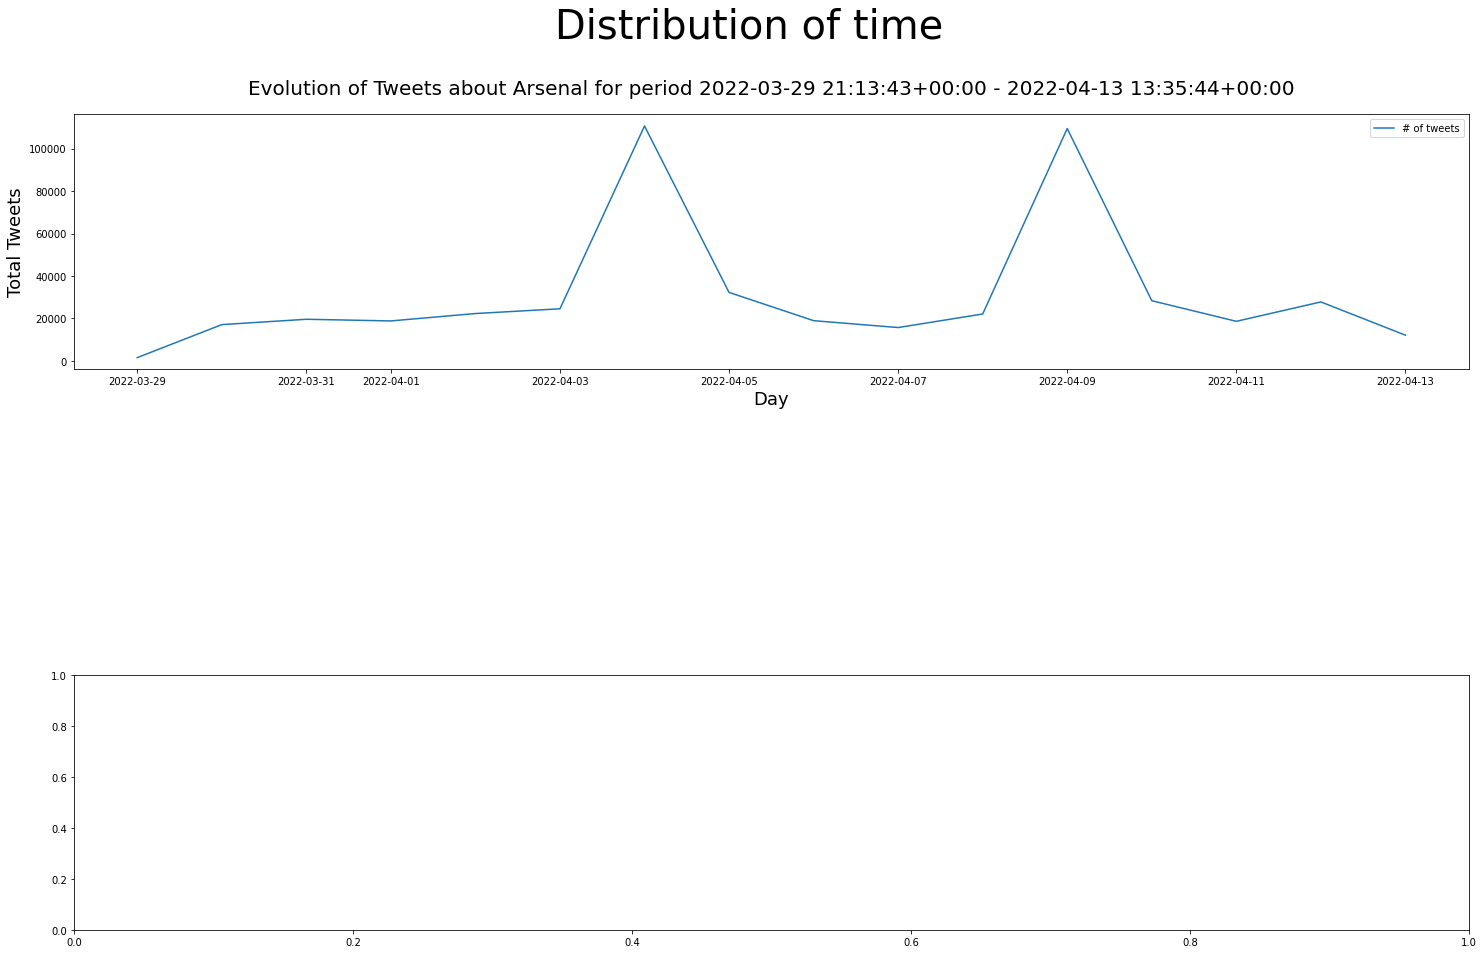

<Figure size 1440x576 with 0 Axes>

In [15]:
## We create a time-series Dataframe and resample by day.
time_df = df[['Date','Username']]
time_df['Date'] = pd.to_datetime(time_df['Date'])
time_df['Tweet'] = 1
time_df.drop(columns='Username', inplace=True)
time_df.set_index('Date', inplace = True)
time_df = time_df.resample('d').sum()
time_df

## We plot the number of tweets during the time period.
fig, axes = plt.subplots(2, figsize=(25,15))
fig.suptitle('Distribution of time', fontsize =40)
fig.subplots_adjust(hspace=1.2)
plt.figure(figsize=(20,8))

axes[0].plot(time_df, label = '# of tweets')
axes[0].set_title('Evolution of Tweets about Arsenal for period {} - {}'.format(df['Date'].min(), df['Date'].max()), fontsize = 20, pad =20)
axes[0].set_xlabel('Day', fontsize = 18)
axes[0].set_ylabel('Total Tweets', fontsize = 18)
axes[0].legend(loc='best')

Let's look at a preview of the 10 most liked tweets. 

In [25]:
## Let's look at the 10 most popular tweets in the dataset.
df[['Tweet','Date','TweetLikes','Username']].sort_values('TweetLikes', ascending =False).head(10)

,Tweet,Date,TweetLikes,Username
52144,Aubameyang has almost scored as many goals as Arsenal since leaving the club ðŸ˜¯ https://t.co/6eq6PsOg99,2022-04-11 11:00:01+00:00,63893,Anonymous69729
415517,"Rape is a weapon of war. Though we donâ€™t yet know the full extent of its use in #Ukraine itâ€™s already clear it was part of ðŸ‡·ðŸ‡º arsenal. Women raped in front of their kids, girls in front of their families, as a deliberate act of subjugation. Rape is a war crime.",2022-04-03 06:13:49+00:00,55029,Anonymous140096
457148,âœ… Six goals\nâœ… Three wins\n\n@M8Arteta has been named the @PremierLeague Manager of the Month! ðŸ¤©,2022-04-01 11:00:01+00:00,51175,Anonymous23114
24399,"If you ever feel stupid, just remember that Arsenal sacked Emery for Arteta.",2022-04-12 20:51:51+00:00,50064,Anonymous211639
248765,Arsenal's former manager Unai Emery couldn't resist ðŸ’€ https://t.co/Nnwg5JsLJz,2022-04-06 09:33:32+00:00,35552,Anonymous69729
451829,"Congratulations to Gabi and his partner Gabrielle on the birth of their beautiful daughter, Maya ðŸ‘¶\n\nYou'll make a great dad, @Biel_M04 ðŸ‘ https://t.co/keMvqSvsuZ",2022-04-01 13:46:55+00:00,35463,Anonymous23114
120127,"@xGPhilosophy Weâ€™ve all been there, @Arsenal",2022-04-09 16:08:22+00:00,34402,Anonymous158793
49397,"Darwin NÃºÃ±ez will leave Benfica in the summer, fee around â‚¬80m. His new agent will now meet with many top clubs to explore opportunities. ðŸ‡ºðŸ‡¾ #transfers\n\nMan United already discussed his name internally - Arsenal wanted him last January as West Ham but Darwin was not for sale. https://t.co/Eo5op4DERa",2022-04-11 13:38:03+00:00,33816,Anonymous71459
291710,Not so many Arsenal fans on my timeline tonight ðŸ¤ª,2022-04-04 21:56:11+00:00,32216,Anonymous83271
444972,"â¤ï¸ For everyone celebrating this month, we wish you a safe and blessed #Ramadan https://t.co/HOsDxBCrR7",2022-04-01 21:03:09+00:00,31813,Anonymous23114


## III. Preprocessing and Modeling

## IV. Conclusions